In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE


In [3]:
df = pd.read_csv('/content/drive/MyDrive/spam.csv', encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'message']
df['label'] = df['label'].map({'ham': 0, 'spam': 1})


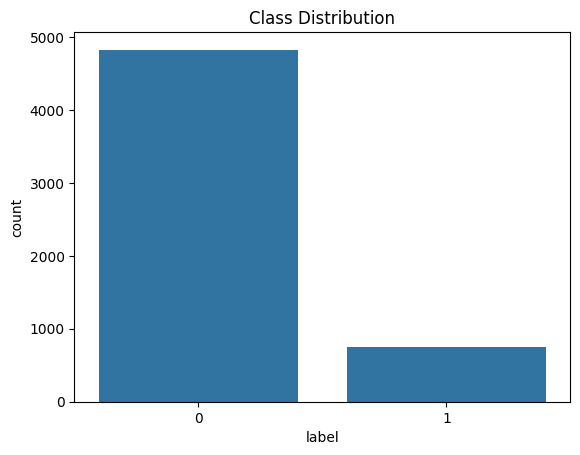

In [4]:
sns.countplot(x='label', data=df)
plt.title("Class Distribution")
plt.show()


In [5]:
def clean_text(text):
    text = text.lower()
    text = re.sub(f"[{re.escape(string.punctuation)}]", '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['cleaned_message'] = df['message'].apply(clean_text)


In [6]:
X = df['cleaned_message']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
tfidf = TfidfVectorizer(stop_words='english', max_df=0.9)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [8]:
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_tfidf, y_train)


In [10]:
def evaluate(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    print(f"\n🔍 {model_name} Performance")
    print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()



🔍 Naive Bayes Performance
              precision    recall  f1-score   support

         Ham       0.99      0.96      0.97       965
        Spam       0.79      0.92      0.85       150

    accuracy                           0.96      1115
   macro avg       0.89      0.94      0.91      1115
weighted avg       0.96      0.96      0.96      1115



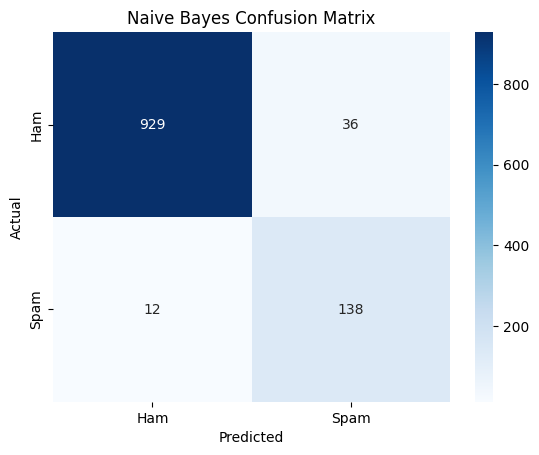

In [11]:
nb = MultinomialNB()
nb.fit(X_train_balanced, y_train_balanced)
evaluate(nb, X_test_tfidf, y_test, "Naive Bayes")



🔍 Logistic Regression Performance
              precision    recall  f1-score   support

         Ham       0.98      0.99      0.98       965
        Spam       0.90      0.88      0.89       150

    accuracy                           0.97      1115
   macro avg       0.94      0.93      0.94      1115
weighted avg       0.97      0.97      0.97      1115



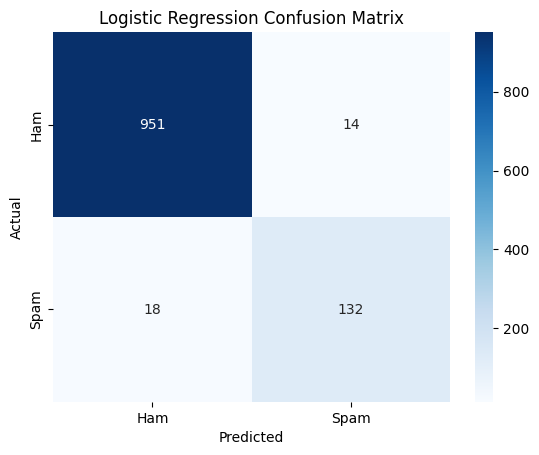

In [12]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_balanced, y_train_balanced)
evaluate(lr, X_test_tfidf, y_test, "Logistic Regression")



🔍 Support Vector Machine Performance
              precision    recall  f1-score   support

         Ham       0.98      0.99      0.99       965
        Spam       0.94      0.90      0.92       150

    accuracy                           0.98      1115
   macro avg       0.96      0.95      0.95      1115
weighted avg       0.98      0.98      0.98      1115



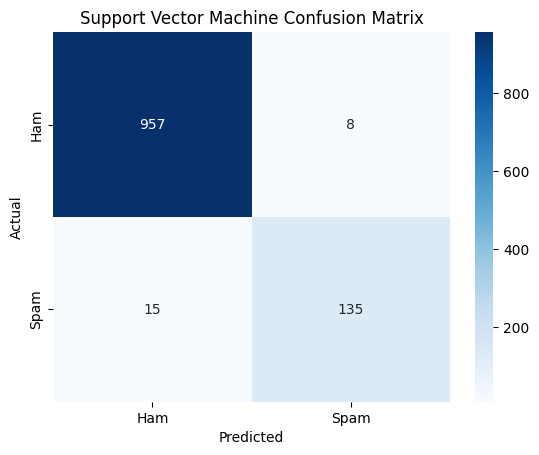

In [14]:
svm = LinearSVC()
svm.fit(X_train_balanced, y_train_balanced)
evaluate(svm, X_test_tfidf, y_test, "Support Vector Machine")
